## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 16s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\91885\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 19s 4s/step - loss: 5.2890 - accuracy: 0.3594 - val_loss: 6.5784 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 7.2195 - accuracy: 0.2812 - val_loss: 3.8121 - val_accuracy: 0.1379
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 3.9863 - accuracy: 0.4688 - val_loss: 7.8444 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 2s 2s/step - loss: 7.3183 - accuracy: 0.3906 - val_loss: 3.7829 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 2s 2s/step - loss: 6.0634 - accuracy: 0.3906 - val_loss: 3.2025 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 2s 2s/step - loss: 1.9831 - accuracy: 0.5312 - val_loss: 4.4810 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 2s 2s/step - loss: 3.4541 - accuracy: 0.4219 - val_loss: 7.1129 - val_accuracy: 0.3103
Epoch 8/50
2/2 [========================

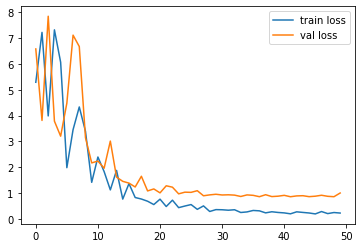

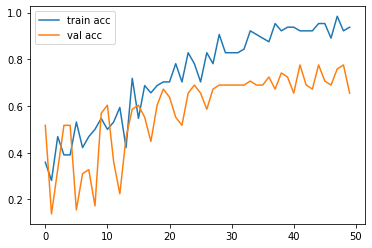

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\91885\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[4.31952439e-02, 1.69488057e-01, 7.87316680e-01],
       [1.03001473e-02, 4.27459300e-01, 5.62240601e-01],
       [4.32127938e-02, 4.49646749e-02, 9.11822557e-01],
       [6.20798618e-02, 1.44321844e-01, 7.93598294e-01],
       [7.95753360e-01, 5.17233312e-02, 1.52523309e-01],
       [2.06311092e-01, 3.51545401e-02, 7.58534372e-01],
       [6.24918938e-03, 6.58881515e-02, 9.27862704e-01],
       [7.23233968e-02, 8.03976297e-01, 1.23700321e-01],
       [1.43063458e-04, 9.89016414e-01, 1.08405398e-02],
       [7.00648800e-02, 4.62443024e-01, 4.67492044e-01],
       [5.10125840e-03, 8.73309793e-04, 9.94025350e-01],
       [1.57967024e-02, 1.62432805e-01, 8.21770549e-01],
       [9.27155077e-01, 1.59180406e-02, 5.69269806e-02],
       [3.14556479e-01, 2.00735912e-01, 4.84707564e-01],
       [8.38355627e-04, 8.69429767e-01, 1.29731834e-01],
       [6.85287872e-03, 8.07336330e-01, 1.85810730e-01],
       [4.16667879e-01, 1.15825953e-02, 5.71749508e-01],
       [1.38471946e-01, 2.36277

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1